# Mall Customer Segmentation

## Topic

You are owing a supermarket mall and through membership cards, you have some basic data about your customers like Customer ID, age, gender, annual income and spending score.
Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.

In this project I will use unsupervised learning method like K-means and NMF (Non-negative Matrix Factorization) ro clustering customers and find out my target customers.

[Github repo](https://github.com/BaffinLee/Mall-Customer-Segmentation)

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import NMF
from sklearn.metrics import silhouette_score
import numpy as np

## Data

The dataset is from [kaggle](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/data).

It has 200 customers, every customer has following attributes:

- CustomerID : Unique ID assigned to the customer
- Gender : Gender of the customer
- Age : Age of the customer
- Annual Income: Annual Income of the customer
- Spending Score: Score assigned by the mall - based on customer behavior and spending nature

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/BaffinLee/Mall-Customer-Segmentation/main/Mall_Customers.csv')

## Exploratory Data Analysis (EDA)

### Inspect features

In [ ]:
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Feature distributions

Distribution of Numerical Features

Histogram of Age, Annual Income, and Spending Score.

We can findout from the follwing plots that the number of customers with high income more than 100k is less, most customers's income is in range 40k to 80k.

The distribution of features seems pretty great, no outliner data points we should worry about.

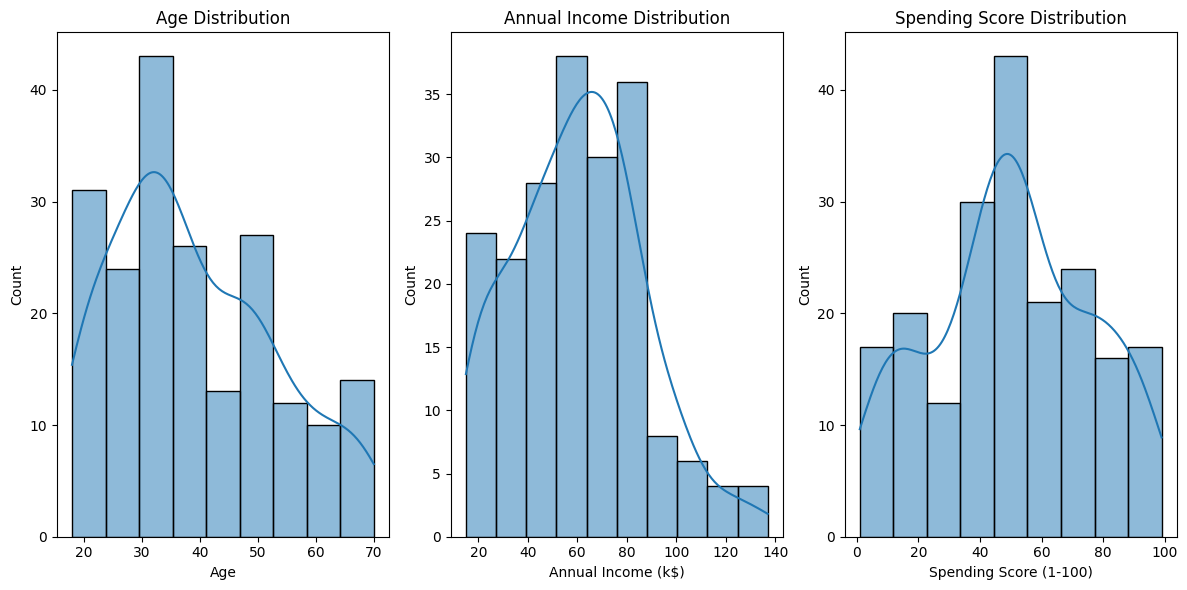

In [ ]:
# Age distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.histplot(data['Age'], kde=True)
plt.title('Age Distribution')

# Annual Income distribution
plt.subplot(1, 3, 2)
sns.histplot(data['Annual Income (k$)'], kde=True)
plt.title('Annual Income Distribution')

# Spending Score distribution
plt.subplot(1, 3, 3)
sns.histplot(data['Spending Score (1-100)'], kde=True)
plt.title('Spending Score Distribution')

plt.tight_layout()
plt.show()

Box Plots for Outlier Detection

Box Plot of Age, Annual Income, and Spending Score.

Through the plot we can know that younger people are more likely to spend more in out store, it's reasonal because their income might be better than elderly.

The group with more income and high spending score could be our store's target customer, we should keep that in mind.

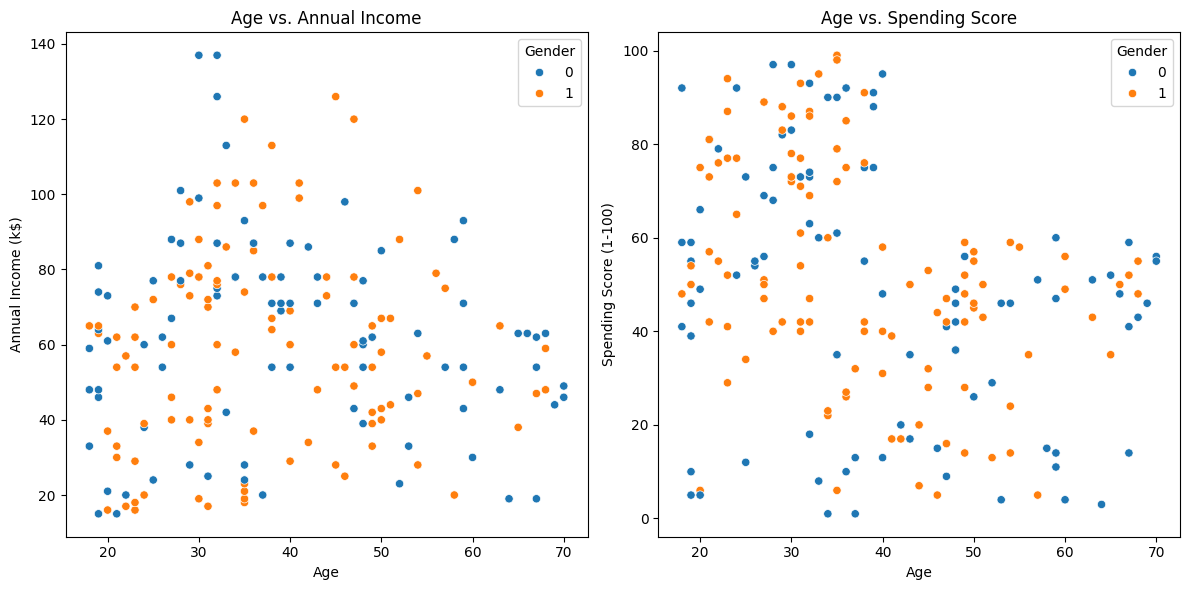

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=data['Age'], y=data['Annual Income (k$)'], hue=data['Gender'])
plt.title('Age vs. Annual Income')

plt.subplot(1, 2, 2)
sns.scatterplot(x=data['Age'], y=data['Spending Score (1-100)'], hue=data['Gender'])
plt.title('Age vs. Spending Score')

plt.tight_layout()
plt.show()

Pair Plot to See Overall Feature Relationships

As the pairplot shows, features are not correlated, so we don't need to worry about it.

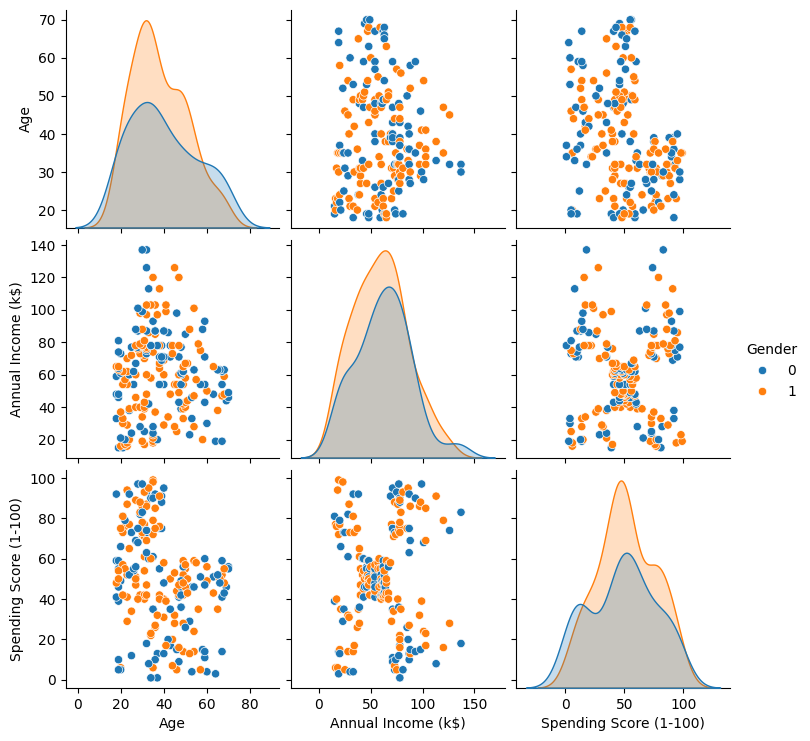

In [ ]:
sns.pairplot(data, hue='Gender', vars=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
plt.show()

### Data clean

Drop emprty data point, because it will disturb the training process.

In [ ]:
data.dropna()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


### Transform data

Tranfrom Gender column to number, Male to be 0, Female to be 1. It will be better if we only have numbers in the training data, so that model can perform well.

In [ ]:
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
print(data['Gender'].info())
data.head()

<class 'pandas.core.series.Series'>
RangeIndex: 200 entries, 0 to 199
Series name: Gender
Non-Null Count  Dtype
--------------  -----
200 non-null    int64
dtypes: int64(1)
memory usage: 1.7 KB
None


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


## Model

### K-means

#### Train K-means model

At first we need to find out how many clusters is best, let's try different cluster number and draw plot to compare.

And we discussed it earlier, annual income and spending score is our main focus feature, because the purpose of this project is meant to analyse our store's target customer and increase store's sales data. Those two type of customers tend to spend more in our store.

So we are going use annual income and spending score to cluster our customer in below.

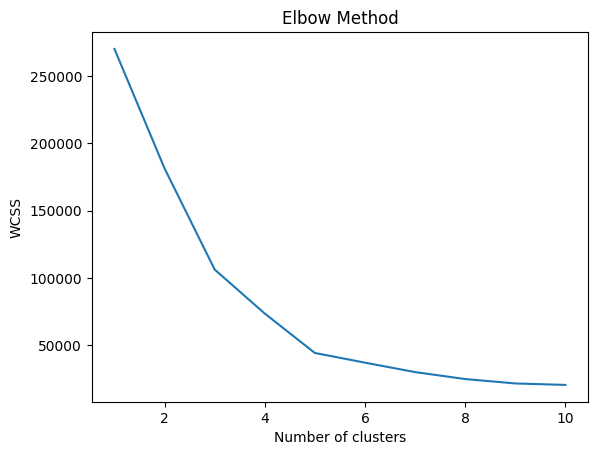

In [ ]:
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(data[['Annual Income (k$)', 'Spending Score (1-100)']])
  wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

After we plot the Elbow Method graph, we can determine that cluster number 5 is a good choice.

In [ ]:
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
data['Cluster'] = kmeans.fit_predict(data[['Annual Income (k$)', 'Spending Score (1-100)']])

print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1       0   19                  15                      39   
1           2       0   21                  15                      81   
2           3       1   20                  16                       6   
3           4       1   23                  16                      77   
4           5       1   31                  17                      40   

   Cluster  
0        4  
1        3  
2        4  
3        3  
4        4  


#### Visualize the Clusters

With cluster plot below, we konw that cluster No.2 is our target customer (with high income and spending).

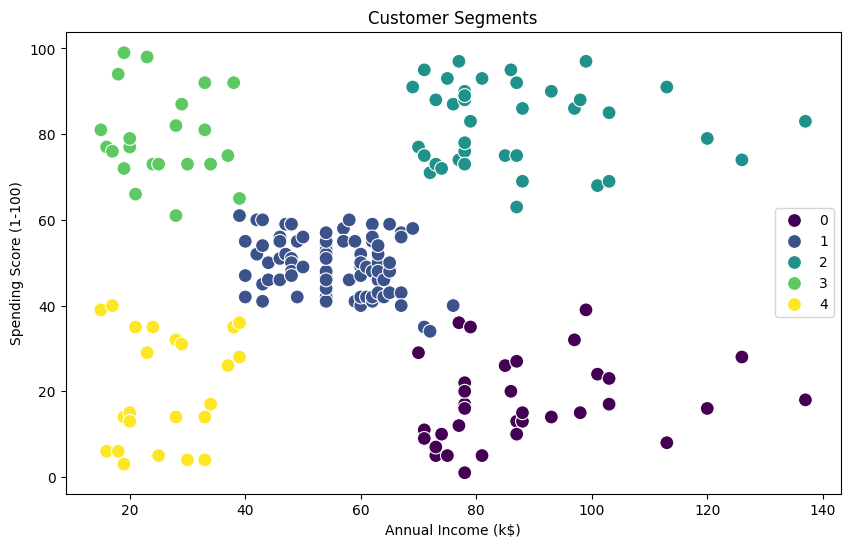

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=data, palette='viridis', s=100)
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

#### Hyperparamters optimization

Let's try other hyperparameters to improve our model's performance.

In [ ]:
# Define hyperparameter grid
param_grid = {
    'init': ['k-means++', 'random'],
    'max_iter': [300, 500],
    'n_init': [10, 20],
    'algorithm': ['lloyd', 'elkan']
}

results = []

# Iterate over all combinations of hyperparameters
for init in param_grid['init']:
  for max_iter in param_grid['max_iter']:
    for n_init in param_grid['n_init']:
      for algorithm in param_grid['algorithm']:
        kmeans = KMeans(
          n_clusters=optimal_clusters,
          init=init,
          max_iter=max_iter,
          n_init=n_init,
          algorithm=algorithm,
          random_state=0
        )
        labels = kmeans.fit_predict(data[['Annual Income (k$)', 'Spending Score (1-100)']])
        inertia = kmeans.inertia_
        silhouette_avg = silhouette_score(data[['Annual Income (k$)', 'Spending Score (1-100)']], labels)

        # Store the results
        results.append({
          'init': init,
          'max_iter': max_iter,
          'n_init': n_init,
          'algorithm': algorithm,
          'inertia': inertia,
          'silhouette_score': silhouette_avg
        })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by=['silhouette_score', 'inertia'], ascending=[False, True])
print(results_df)

# Choose the best hyperparameters
best_params = results_df.iloc[0]
# Display the results
print(best_params)


         init  max_iter  n_init algorithm       inertia  silhouette_score
0   k-means++       300      10     lloyd  44448.455448          0.553932
1   k-means++       300      10     elkan  44448.455448          0.553932
2   k-means++       300      20     lloyd  44448.455448          0.553932
3   k-means++       300      20     elkan  44448.455448          0.553932
4   k-means++       500      10     lloyd  44448.455448          0.553932
5   k-means++       500      10     elkan  44448.455448          0.553932
6   k-means++       500      20     lloyd  44448.455448          0.553932
7   k-means++       500      20     elkan  44448.455448          0.553932
8      random       300      10     lloyd  44448.455448          0.553932
9      random       300      10     elkan  44448.455448          0.553932
10     random       300      20     lloyd  44448.455448          0.553932
11     random       300      20     elkan  44448.455448          0.553932
12     random       500      10     ll

We use inertia and silhouette_score to determine which model performs better, due to dataset is too small in this project, there aren't much difference. But since hyperparamters optimization is an important process in real word project, we will keep it here.

The best params we selected is:

- init: k-means++
- max_iter: 300
- n_init: 10
- algorithm: lloyd

Build the Final Model with Best Hyperparameters

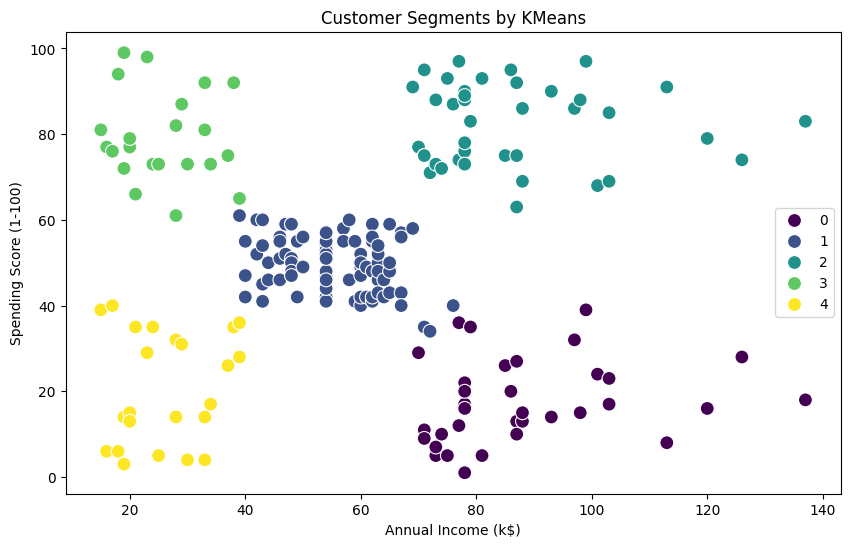

Cluster Centers:
 [[88.2        17.11428571]
 [55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [26.30434783 20.91304348]]


In [ ]:
# Build the final model using the best hyperparameters
final_kmeans = KMeans(
    n_clusters=optimal_clusters,
    init=best_params['init'],
    max_iter=best_params['max_iter'],
    n_init=best_params['n_init'],
    algorithm=best_params['algorithm'],
    random_state=0
)

# Fit the final model
data['Cluster'] = final_kmeans.fit_predict(data[['Annual Income (k$)', 'Spending Score (1-100)']])

# Visualize the final clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=data, palette='viridis', s=100)
plt.title('Customer Segments by KMeans')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# Display cluster centers
print('Cluster Centers:\n', final_kmeans.cluster_centers_)

#### Target customers

Cluster No.2 is our target customer (with high income and spending), let's output the list.

In [ ]:
target_customers = data[data['Cluster'] == 2]
print(target_customers)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
123         124       0   39                  69                      91   
125         126       1   31                  70                      77   
127         128       0   40                  71                      95   
129         130       0   38                  71                      75   
131         132       0   39                  71                      75   
133         134       1   31                  72                      71   
135         136       1   29                  73                      88   
137         138       0   32                  73                      73   
139         140       1   35                  74                      72   
141         142       0   32                  75                      93   
143         144       1   32                  76                      87   
145         146       0   28                  77                      97   
147         

### NMF Model

Let's use NMF (Non-negative Matrix Factorization) to find out our target users.

#### Train NMF model

The NMF model is used to compare with K-means model, so we will use the same cluster number as 5 here.

In [ ]:
n_components = 5
nmf = NMF(n_components=n_components, random_state=42)

# Fit the NMF model and transform the data
W = nmf.fit_transform(data)
H = nmf.components_

# Assign cluster labels based on the highest weight
data['NMF_Cluster'] = W.argmax(axis=1)

print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1       0   19                  15                      39   
1           2       0   21                  15                      81   
2           3       1   20                  16                       6   
3           4       1   23                  16                      77   
4           5       1   31                  17                      40   

   Cluster  NMF_Cluster  
0        4            4  
1        3            4  
2        4            1  
3        3            4  
4        4            4  


#### Visualize the Clusters



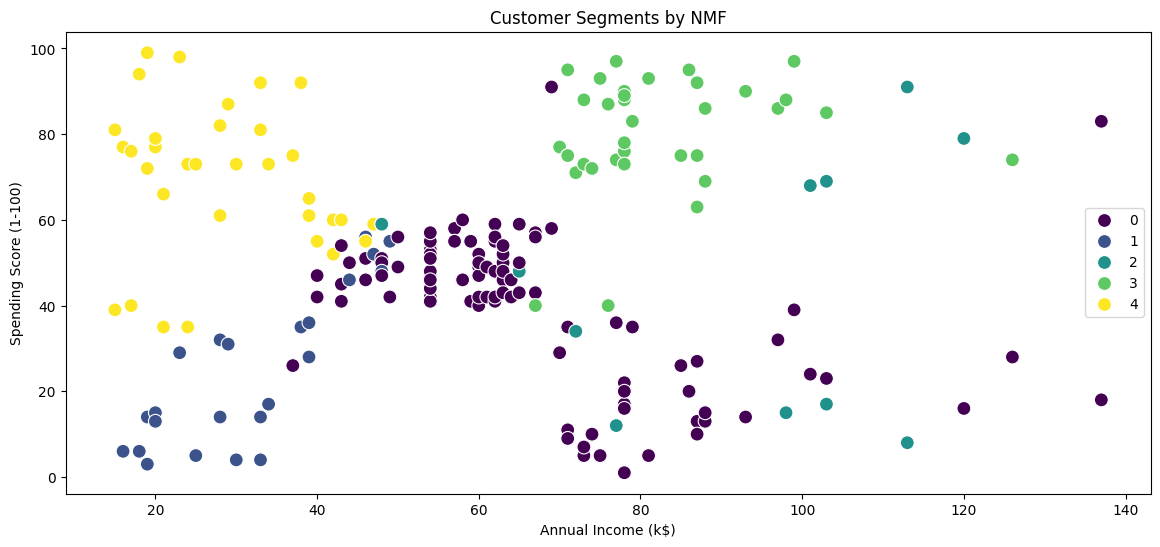

In [ ]:
# Visualize the NMF clusters
plt.figure(figsize=(14, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='NMF_Cluster', data=data, palette='viridis', s=100)
plt.title('Customer Segments by NMF')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()

plt.show()

#### Hyperparamters optimization

Let's try other hyperparameters to improve our model's performance.


In [ ]:
# Define hyperparameter grid
param_grid = {
  'init': ['random', 'nndsvda'],
  'solver': ['cd', 'mu'],
  'beta_loss': ['frobenius', 'kullback-leibler'],
  'max_iter': [200, 500],
  'tol': [1e-4, 1e-2]
}

results = []

# Iterate over all combinations of hyperparameters
for init in param_grid['init']:
  for solver in param_grid['solver']:
    for beta_loss in param_grid['beta_loss']:
      for max_iter in param_grid['max_iter']:
        for tol in param_grid['tol']:
          if solver == 'cd' and beta_loss == 'kullback-leibler':
            continue
          nmf_model = NMF(
            n_components=n_components,
            init=init,
            solver=solver,
            beta_loss=beta_loss,
            max_iter=max_iter,
            tol=tol,
            random_state=42
          )
          W = nmf_model.fit_transform(data)
          labels = np.argmax(W, axis=1)
          silhouette_avg = silhouette_score(data, labels)

          # Store the results
          results.append({
            'init': init,
            'solver': solver,
            'beta_loss': beta_loss,
            'max_iter': max_iter,
            'tol': tol,
            'silhouette_score': silhouette_avg
          })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by=['silhouette_score', 'max_iter'], ascending=[False, True])

# Display the results
print(results_df)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklea

       init solver         beta_loss  max_iter     tol  silhouette_score
12  nndsvda     cd         frobenius       200  0.0001          0.193314
14  nndsvda     cd         frobenius       500  0.0001          0.193314
16  nndsvda     mu         frobenius       200  0.0001          0.151524
18  nndsvda     mu         frobenius       500  0.0001          0.151524
1    random     cd         frobenius       200  0.0100          0.123593
3    random     cd         frobenius       500  0.0100          0.123593
20  nndsvda     mu  kullback-leibler       200  0.0001          0.122014
22  nndsvda     mu  kullback-leibler       500  0.0001          0.122014
13  nndsvda     cd         frobenius       200  0.0100          0.116864
15  nndsvda     cd         frobenius       500  0.0100          0.116864
4    random     mu         frobenius       200  0.0001          0.110869
6    random     mu         frobenius       500  0.0001          0.103281
21  nndsvda     mu  kullback-leibler       200  0.0

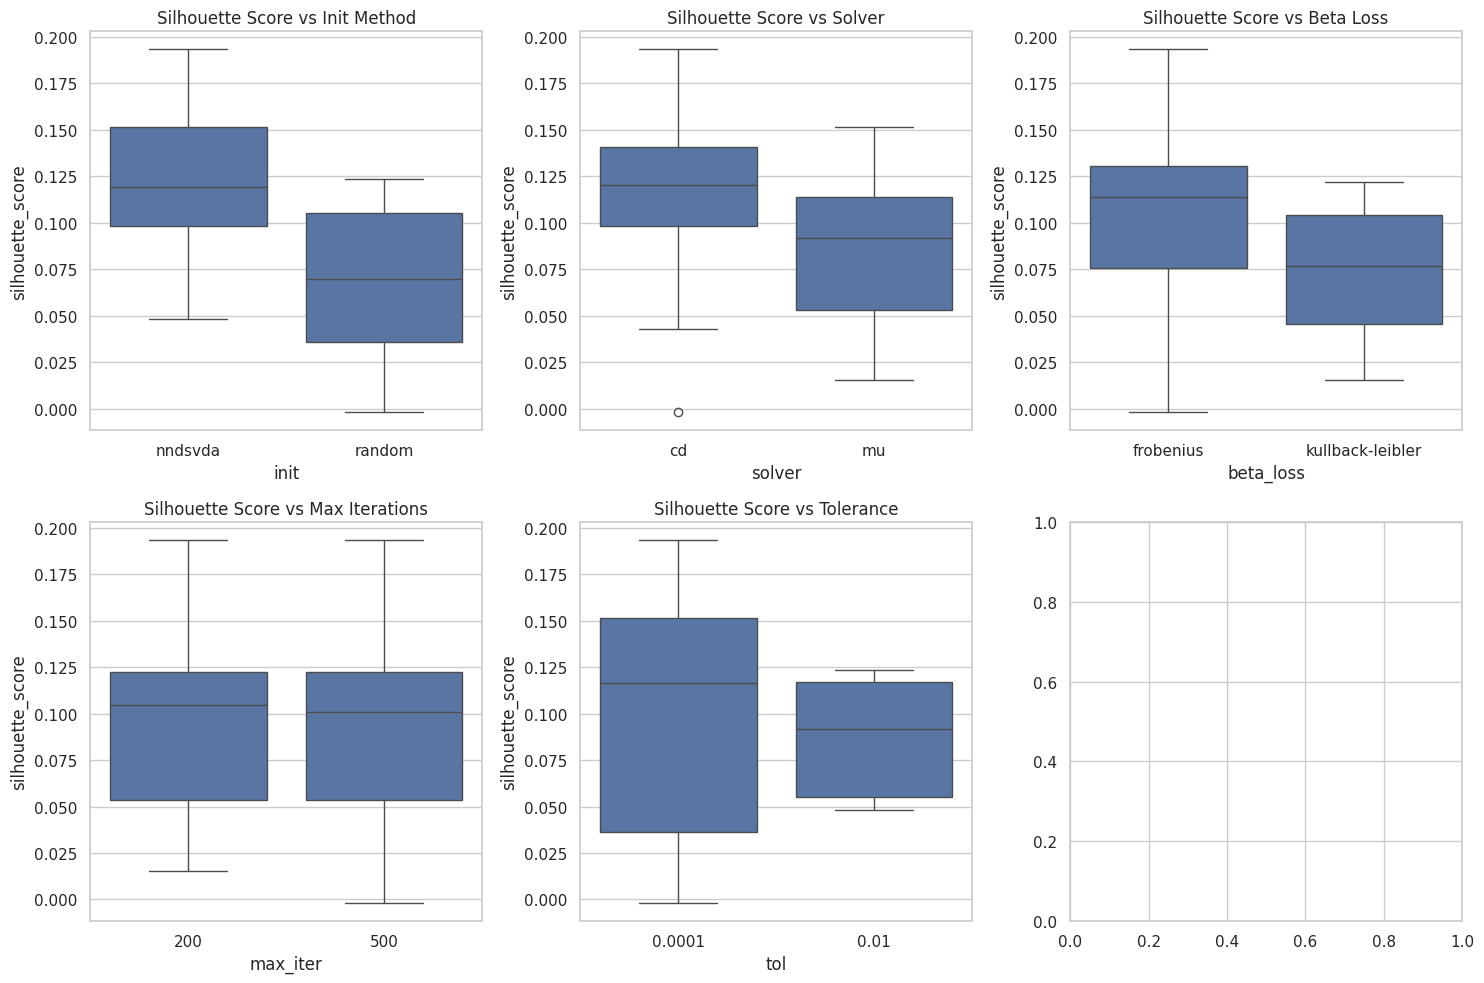

In [ ]:
# Plot silhouette score vs. different hyperparameters
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Plot silhouette score for different 'init' methods
sns.boxplot(x='init', y='silhouette_score', data=results_df, ax=axes[0, 0])
axes[0, 0].set_title('Silhouette Score vs Init Method')

# Plot silhouette score for different 'solver' values
sns.boxplot(x='solver', y='silhouette_score', data=results_df, ax=axes[0, 1])
axes[0, 1].set_title('Silhouette Score vs Solver')

# Plot silhouette score for different 'beta_loss' values
sns.boxplot(x='beta_loss', y='silhouette_score', data=results_df, ax=axes[0, 2])
axes[0, 2].set_title('Silhouette Score vs Beta Loss')

# Plot silhouette score for different 'max_iter' values
sns.boxplot(x='max_iter', y='silhouette_score', data=results_df, ax=axes[1, 0])
axes[1, 0].set_title('Silhouette Score vs Max Iterations')

# Plot silhouette score for different 'tol' values
sns.boxplot(x='tol', y='silhouette_score', data=results_df, ax=axes[1, 1])
axes[1, 1].set_title('Silhouette Score vs Tolerance')

plt.tight_layout()
plt.show()


In [ ]:
# Choose the best hyperparameters
best_params = results_df.iloc[0]
# Display the results
print(best_params)

init                  nndsvda
solver                     cd
beta_loss           frobenius
max_iter                  200
tol                    0.0001
silhouette_score     0.193314
Name: 12, dtype: object


We use inertia and silhouette_score to determine which model performs better, due to dataset is too small in this project, there aren't much difference. But since hyperparamters optimization is an important process in real word project, we will keep it here.

The best params we selected is:

- init: nndsvda
- solver: cd
- beta_loss: frobenius
- max_iter: 200
- tol: 0.0001

Build the Final Model with Best Hyperparameters

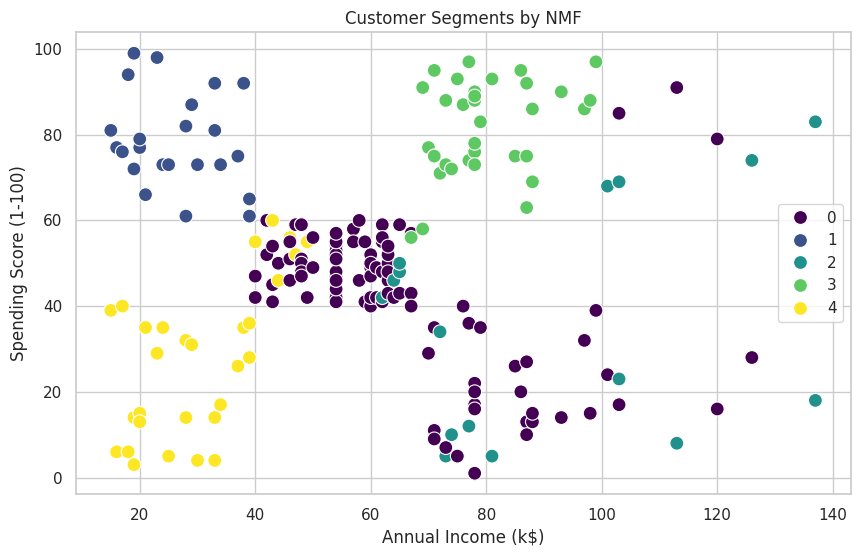

In [ ]:
# Build the final NMF model using the best hyperparameters
final_nmf_model = NMF(
    n_components=n_components,
    init=best_params['init'],
    solver=best_params['solver'],
    beta_loss=best_params['beta_loss'],
    max_iter=best_params['max_iter'],
    tol=best_params['tol'],
    random_state=42
)

# Fit the final model
W = final_nmf_model.fit_transform(data)
data['NMF_Cluster'] = np.argmax(W, axis=1)

# Visualize the final clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='NMF_Cluster', data=data, palette='viridis', s=100)
plt.title('Customer Segments by NMF')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


#### Target customers

Cluster No.3 is our target customer (with high income and spending), let's output the list.

In [ ]:
target_users = data[data['NMF_Cluster'] == 3]
print(target_users)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
120         121       0   27                  67                      56   
122         123       1   40                  69                      58   
123         124       0   39                  69                      91   
125         126       1   31                  70                      77   
127         128       0   40                  71                      95   
129         130       0   38                  71                      75   
131         132       0   39                  71                      75   
133         134       1   31                  72                      71   
135         136       1   29                  73                      88   
137         138       0   32                  73                      73   
139         140       1   35                  74                      72   
141         142       0   32                  75                      93   
143         

### Model compare

By comparing the visualizations and descriptive statistics of the clusters obtained from both KMeans and NMF, we can evaluate which method provides more meaningful and actionable insights for customer segmentation. Typically, the choice between KMeans and NMF will depend on the specific characteristics of the data and the business context in which the clustering is being applied.

In this project, as the cluster plot of each model shows, the K-means model performs better than NMF model. Because we can see on the plot, the cluster we got from K-means algorithm is more well-separated, the edge is more clear.

The reason why K-means performs better is, KMeans directly minimizes the within-cluster sum of squares (WCSS), which is closely aligned with the goal of clustering—grouping similar data points together. This objective often results in well-separated, compact clusters.

## Conclusion

In this project we used two unsupervised learning method to group our store's target customers.

By domain knowledge we know that customer with higher incom and spending score is our target customer.

So in the process of model training and testing, we care annual income and spending score cloumn most.

With the cluster plot we generated from each model, the K-means cluster plot is more intuitive. The group we got from K-means model is more well-cluster, the edge between each cluster is more clear. So we think K-means model is better for this project.

After we got the target customers list, we can apply marketing strategy to them. I am sure the target customers list will help increase our stores revenue.